# Name: Hania Rasheed
# Reg no: B23S0983DS009
# Program: DS 23 (S)


# Logistic Regression
- Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
- According to the requirements, we need to create a binary classification column named price trajectory.

In [14]:
dataset = pd.read_csv("BTC-USD.csv")
dataset.dropna(inplace=True)
dataset = dataset.sort_values(by='Date')

# Create the binary classification column 'Price_Trajectory'
dataset['Price_Trajectory'] = (dataset['Close'].shift(-1) >= dataset['Close']).astype(int)
# if closing of upcoming day is greater or equal than previous day, store it as binary one
# Handle the last row NaN by setting it to 0 or dropping it
dataset['Price_Trajectory'].iloc[-1] = 0

# Extract features (X) and target (y)
# Assuming 'Price' is a feature you want to use for prediction. Replace 'Price' with the correct column name if it's different.
X = dataset[['Close']].values  # Example feature. Modify based on your actual features.
y = dataset['Price_Trajectory'].values

# Print the first few rows to verify
print(dataset.head())
print(X[:5])
print(y[:5])


         Date          Open          High           Low         Close  \
0  2023-03-21  27768.392578  28439.562500  27439.646484  28175.816406   
1  2023-03-22  28158.720703  28803.335938  26759.996094  27307.437500   
2  2023-03-23  27301.957031  28729.843750  27183.363281  28333.972656   
3  2023-03-24  28324.111328  28388.437500  27039.265625  27493.285156   
4  2023-03-25  27487.337891  27791.826172  27196.234375  27494.707031   

      Adj Close        Volume  Price_Trajectory  
0  28175.816406  3.610219e+10                 0  
1  27307.437500  3.338202e+10                 1  
2  28333.972656  2.422043e+10                 0  
3  27493.285156  2.598031e+10                 1  
4  27494.707031  1.338301e+10                 1  
[[28175.816406]
 [27307.4375  ]
 [28333.972656]
 [27493.285156]
 [27494.707031]]
[0 1 0 1 1]


C:\Users\hania\AppData\Local\Temp\ipykernel_8832\685069678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Price_Trajectory'].iloc[-1] = 0


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

[[27159.652344]
 [35049.355469]
 [27968.839844]
 [29074.091797]
 [30295.806641]
 [26719.291016]
 [29151.958984]
 [28199.308594]
 [68498.882813]
 [26008.462891]
 [46368.585938]
 [25833.34375 ]
 [27925.859375]
 [33901.527344]
 [29282.914063]
 [43185.859375]
 [37313.96875 ]
 [34502.820313]
 [30620.769531]
 [72123.90625 ]
 [27415.912109]
 [42156.902344]
 [43023.972656]
 [26568.28125 ]
 [42511.96875 ]
 [26049.556641]
 [35437.253906]
 [25851.240234]
 [27307.4375  ]
 [26124.140625]
 [28348.441406]
 [41450.222656]
 [37289.621094]
 [26431.640625]
 [29227.390625]
 [42099.402344]
 [29675.732422]
 [42623.539063]
 [38688.75    ]
 [27591.384766]
 [61198.382813]
 [27525.339844]
 [67913.671875]
 [30271.130859]
 [25124.675781]
 [29993.896484]
 [39933.808594]
 [27297.265625]
 [73083.5     ]
 [26579.390625]
 [25779.982422]
 [30342.265625]
 [28904.623047]
 [41618.40625 ]
 [26754.28125 ]
 [27249.589844]
 [29042.126953]
 [63167.371094]
 [25812.416016]
 [42627.855469]
 [28822.679688]
 [43292.664063]
 [37720.

In [17]:
print(y_train)

[1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0]


In [18]:
print(X_test)

[[30514.166016]
 [44080.648438]
 [29534.384766]
 [30315.355469]
 [26345.998047]
 [62029.847656]
 [26851.029297]
 [41816.871094]
 [37880.582031]
 [27139.888672]
 [29913.923828]
 [29561.494141]
 [43725.984375]
 [44167.332031]
 [41796.269531]
 [28415.748047]
 [46139.730469]
 [30477.251953]
 [34089.574219]
 [29765.492188]
 [29429.591797]
 [27946.597656]
 [26890.128906]
 [46970.503906]
 [42742.652344]
 [37712.746094]
 [28085.646484]
 [52160.203125]
 [30391.646484]
 [27021.546875]
 [30084.539063]
 [30590.078125]
 [28177.984375]
 [29473.787109]
 [26930.638672]
 [27994.330078]
 [27129.585938]
 [29230.111328]
 [43779.699219]
 [26334.818359]
 [26862.375   ]
 [41262.058594]
 [28719.806641]
 [43746.445313]
 [29652.980469]
 [41665.585938]
 [29682.949219]
 [29918.412109]
 [36154.769531]
 [26476.207031]
 [25832.226563]
 [33909.800781]
 [37138.050781]
 [25800.724609]
 [30027.296875]
 [27192.693359]
 [26804.990234]
 [29178.679688]
 [26336.212891]
 [25760.097656]
 [47771.277344]
 [42240.117188]
 [27268.

In [19]:
print(y_test)

[0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1]


## Feature Scaling

- Feature Scaling method computes the mean and standard deviation of each feature in the training set (X_train) and testing set (X_test), and then standardizes the features based on these statistics.

Standardization, also known as z-score normalization, is a preprocessing technique used in machine learning to transform features so that they have a mean of 0 and a standard deviation of 1. This process involves subtracting the mean of each feature from the data and then dividing by the standard deviation.

Standardization is particularly useful when the features in the dataset have different scales or units. By standardizing the features, you ensure that each feature contributes equally to the analysis and prevents features with larger scales from dominating those with smaller scales.

- The StandardScaler function of sklearn is based on the theory that the dataset's variables whose values lie in different ranges do not have an equal contribution to the model's fit parameters and training function and may even lead to bias in the predictions made with that model.

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-7.27702954e-01]
 [-3.71924516e-02]
 [-6.56882486e-01]
 [-5.60150319e-01]
 [-4.53225265e-01]
 [-7.66243583e-01]
 [-5.53335346e-01]
 [-6.36711753e-01]
 [ 2.89032580e+00]
 [-8.28455593e-01]
 [ 9.53471886e-01]
 [-8.43782102e-01]
 [-6.60644157e-01]
 [-1.37650905e-01]
 [-5.41874097e-01]
 [ 6.74918171e-01]
 [ 1.61007560e-01]
 [-8.50254637e-02]
 [-4.24784361e-01]
 [ 3.20758955e+00]
 [-7.05274980e-01]
 [ 5.84863371e-01]
 [ 6.60749769e-01]
 [-7.79460028e-01]
 [ 6.15938948e-01]
 [-8.24859048e-01]
 [-3.24339919e-03]
 [-8.42215793e-01]
 [-7.14768728e-01]
 [-8.18331423e-01]
 [-6.23659580e-01]
 [ 5.23014434e-01]
 [ 1.58876642e-01]
 [-7.91418880e-01]
 [-5.46733534e-01]
 [ 5.79830944e-01]
 [-5.07494450e-01]
 [ 6.25703634e-01]
 [ 2.81329058e-01]
 [-6.89917531e-01]
 [ 2.25138263e+00]
 [-6.95697813e-01]
 [ 2.83910787e+00]
 [-4.55384901e-01]
 [-9.05805053e-01]
 [-4.79648583e-01]
 [ 3.90297167e-01]
 [-7.15658975e-01]
 [ 3.29157364e+00]
 [-7.78487731e-01]
 [-8.48452310e-01]
 [-4.49159153e-01]
 [-5.7498230

In [22]:
print(X_test)

[[-0.43411435]
 [ 0.75323053]
 [-0.51986526]
 [-0.45151434]
 [-0.79891436]
 [ 2.32415283]
 [-0.75471379]
 [ 0.55510368]
 [ 0.21059782]
 [-0.72943268]
 [-0.48664783]
 [-0.51749264]
 [ 0.72219016]
 [ 0.76081712]
 [ 0.55330062]
 [-0.61776887]
 [ 0.93344235]
 [-0.43734509]
 [-0.12119295]
 [-0.49963863]
 [-0.52903679]
 [-0.65882913]
 [-0.75129177]
 [ 1.00615203]
 [ 0.63612848]
 [ 0.19590874]
 [-0.64665951]
 [ 1.46035693]
 [-0.44483732]
 [-0.73979001]
 [-0.4717155 ]
 [-0.42747049]
 [-0.63857806]
 [-0.5251688 ]
 [-0.74774634]
 [-0.65465157]
 [-0.73033438]
 [-0.54649542]
 [ 0.72689131]
 [-0.79989281]
 [-0.75372081]
 [ 0.50654623]
 [-0.59115752]
 [ 0.72398091]
 [-0.50948571]
 [ 0.54186313]
 [-0.50686283]
 [-0.48625501]
 [ 0.0595539 ]
 [-0.78751841]
 [-0.84387988]
 [-0.13692681]
 [ 0.14561114]
 [-0.84663694]
 [-0.47672537]
 [-0.72481119]
 [-0.75874315]
 [-0.55099674]
 [-0.79977076]
 [-0.85019263]
 [ 1.07623609]
 [ 0.59214637]
 [-0.71820886]
 [-0.44013702]
 [ 1.12197784]
 [ 1.89140993]
 [-0.73846

## Training the Logistic Regression model on the Training set

Logistic regression is a type of regression analysis used for predicting the probability of a binary outcome.

random_state = 0, is provided to ensure reproducibility, meaning that if the same code is run multiple times with the same random state, it will produce the same results.

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [37]:
print(classifier.predict(sc.transform([[29402.779203]])))

[1]


## Predicting the Test set results

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]]


## Making the Confusion Matrix

The confusion matrix gives a summary of prediction results on a classification problem. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 0 48]
 [ 0 44]]


0.4782608695652174

# Visualize the confusion matrix
We see that:
- True Negative = 0
- False Negative = 48
- False Positive = 0
- True Positive = 44

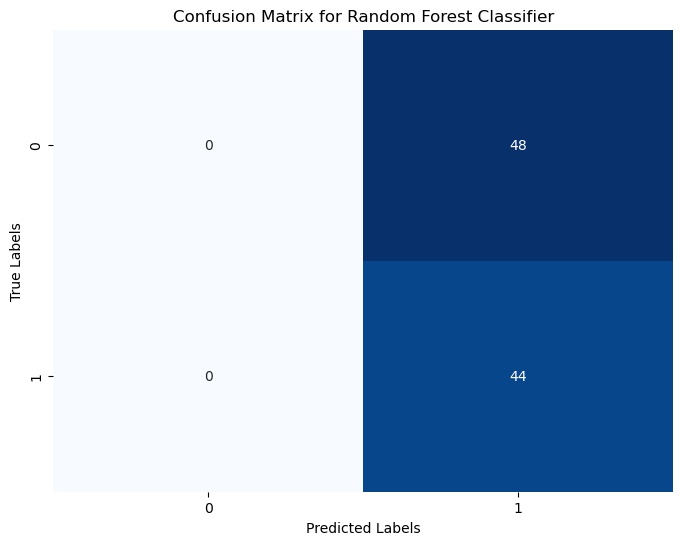

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Evaluation metrics

Are quantitative measures used to assess the performance of a machine learning model. These metrics help determine how well a model is making predictions and can vary depending on the type of problem (classification, regression, clustering, etc.).

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## Accuracy Score:

- The proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4782608695652174


## Precision:

- Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions

OR
- The proportion of true positive predictions out of all positive predictions (i.e., the accuracy of positive predictions)

In [43]:
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.4782608695652174


## Recall (Sensitivity):

- Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

OR
- The proportion of true positive predictions out of all actual positives

In [44]:
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 1.0


## F1 Score:

- The F1 Score is the weighted average of Precision and Recall. It tries to find the balance between Precision and Recall.

OR
- The harmonic mean of precision and recall, providing a balance between the two.

In [45]:
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.6470588235294118


## ROC-AUC Score:

- The area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate at various threshold settings. The AUC (Area Under the Curve) score ranges from 0 to 1, with higher values indicating better performance.

In [46]:
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC Score:', roc_auc)

ROC-AUC Score: 0.5


In [47]:
pd.DataFrame(zip(['Accuracy','Precision','Recall','F1-score','AUC'],[accuracy , precision , recall, f1 , roc_auc])).transpose()

,0,1,2,3,4
0,Accuracy,Precision,Recall,F1-score,AUC
1,0.478261,0.478261,1.0,0.647059,0.5


## Classification Report:

- The classification report provides a detailed account of Precision, Recall, F1 Score, and Support for each class

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.48      1.00      0.65        44

    accuracy                           0.48        92
   macro avg       0.24      0.50      0.32        92
weighted avg       0.23      0.48      0.31        92



C:\Users\hania\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hania\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hania\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
